In [73]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [74]:
img = cv2.imread("../assets/imori.jpg")[:,:,::-1]

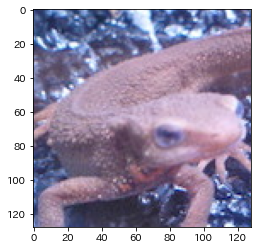

In [75]:
# Identity
def identity(img):
    h, w = img.shape[:2]
    src = np.array([[0.0,0.0], [0.0,1.0], [1.0,0.0]], np.float32)
    af = cv2.getAffineTransform(src, src)
    return cv2.warpAffine(img, af, (w, h))

converted = identity(img)
plt.imshow(converted)

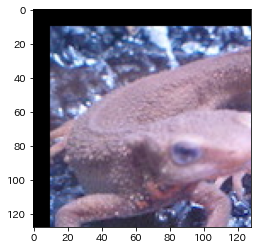

In [76]:
# Shift
def shift(img, shift_x, shift_y):
    h, w = img.shape[:2]
    src = np.array([[0.0,0.0], [0.0,1.0], [1.0,0.0]], np.float32)
    dest = src.copy()
    # shift pixel
    dest[:,0] += shift_x
    dest[:,1] += shift_y
    af = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(img, af, (w, h))

converted = shift(img, 10, 10)
plt.imshow(converted)

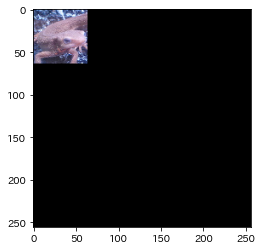

In [77]:
# Scale change
def scale(img, r):
    h, w = img.shape[:2]
    src = np.array([[0.0,0.0], [0.0,1.0], [1.0,0.0]], np.float32)
    dest = src* r
    af = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(img, af, (2*w, 2*h), cv2.INTER_LANCZOS4)  # specify a flag

converted = scale(img, 0.5)
plt.imshow(converted)

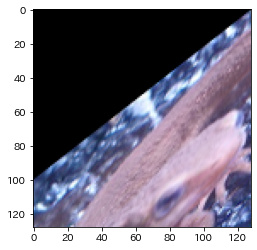

In [78]:
# Shear
def shear(img, shear_x, shear_y):
    h, w = img.shape[:2]
    src = np.array([[0.0,0.0], [0.0,1.0], [1.0,0.0]], np.float32)
    dest = src.copy()
    # shear pixel
    dest[:,0] += (shear_x / h * (h - src[:,1])).astype(np.float32)
    dest[:,1] += (shear_y / w * (w - src[:,0])).astype(np.float32)
    af = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(img, af, (w, h))

converted = shear(img, 0, 100)
plt.imshow(converted)

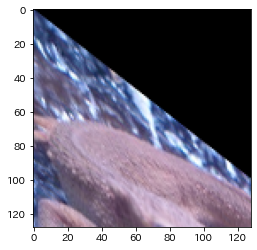

In [79]:
# Shear (Difference points)
def shear(img, shear_x, shear_y):
    h, w = img.shape[:2]
    src = np.array([[0.0,0.0], [0.0,1.0], [1.0,0.0]], np.float32)
    dest = src.copy()
    # shear pixel
    dest[:,0] += (shear_x / h * src[:,1]).astype(np.float32)
    dest[:,1] += (shear_y / w * src[:,0]).astype(np.float32)
    af = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(img, af, (w, h))

converted = shear(img, 0, 100)
plt.imshow(converted)

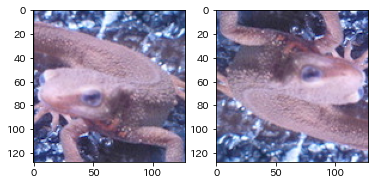

In [80]:
# Flip
def horizontal_flip(img):
    h, w = img.shape[:2]
    src = np.array([[0.0,0.0], [0.0,1.0], [1.0,0.0]], np.float32)
    dest = src.copy()
    dest[:,0] = w - src[:,0]
    af = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(img, af, (w, h))

def vertical_flip(img):
    h, w = img.shape[:2]
    src = np.array([[0.0,0.0], [0.0,1.0], [1.0,0.0]], np.float32)
    dest = src.copy()
    dest[:,1] = h - src[:,1]
    af = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(img, af, (w, h))

converted1 = horizontal_flip(img)
converted2 = vertical_flip(img)
plt.subplot(121)
plt.imshow(converted1)
plt.subplot(122)
plt.imshow(converted2)

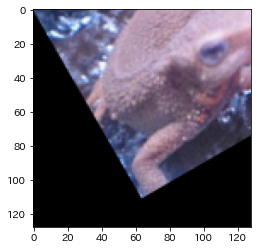

In [81]:
# Rotate on top left
def rotate(img, ang):
    h, w =img.shape[:2]
    af = cv2.getRotationMatrix2D((0,0), ang, 1.0)
    return cv2.warpAffine(img, af, (w,h))

converted = rotate(img, 30)
plt.imshow(converted)

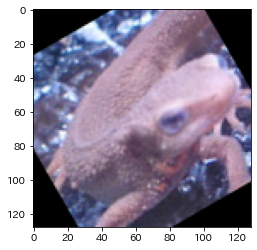

In [82]:
# Rotate on center
def rotate(img, ang):
    h, w =img.shape[:2]
    af = cv2.getRotationMatrix2D((w/2,h/2), ang, 1.0)
    return cv2.warpAffine(img, af, (w,h))

converted = rotate(img, 30)
plt.imshow(converted)

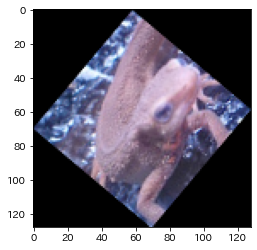

In [83]:
# Fit rotate
def rotate_fit(img, ang):
    h, w = img.shape[:2]
    # rotate size
    radian =np.radians(ang)
    sin = np.abs(np.sin(radian))
    cos = np.abs(np.cos(radian))
    tri_mat = np.array([[cos, sin], [sin, cos]], np.float32)
    old_size = np.array([w,h], np.float32)
    new_size = np.ravel(np.dot(tri_mat, old_size.reshape(-1,1)))
    # rotate affine
    af = cv2.getRotationMatrix2D((w/2,h/2), ang, 1.0)
    # shift
    af[:2,2] += (new_size - old_size) / 2.0
    # resize
    af[:2,:] *= (old_size / new_size).reshape(-1,1)
    return cv2.warpAffine(img, af, (w,h))

converted = rotate_fit(img,50)
plt.imshow(converted)

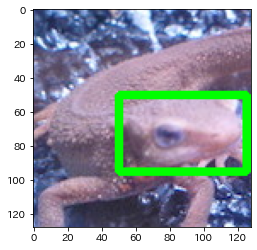

In [86]:
# Annotation
def draw_face(img, bbox):
    canvas = img.copy()
    canvas = cv2.line(canvas, tuple(bbox[0,0]), tuple(bbox[0,1]), (0,255,0), 3)
    canvas = cv2.line(canvas, tuple(bbox[0,0]), tuple(bbox[0,2]), (0,255,0), 3)
    canvas = cv2.line(canvas, tuple(bbox[0,1]), tuple(bbox[0,3]), (0,255,0), 3)
    canvas = cv2.line(canvas, tuple(bbox[0,2]), tuple(bbox[0,3]), (0,255,0), 3)
    return canvas

bbox = np.array([[[50,50], [125,50], [50, 95], [125, 95]]], np.float32)
img_bb = draw_face(img, bbox)
plt.imshow(img_bb)

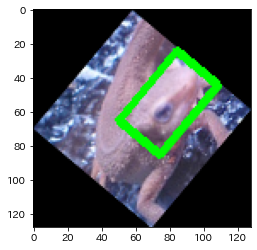

In [91]:
# Rotate fit with bb
def rotate_fit_with_bb(img, ang):
    h, w = img.shape[:2]
    # transform image
    # size after rotate
    radian =np.radians(ang)
    sin = np.abs(np.sin(radian))
    cos = np.abs(np.cos(radian))
    tri_mat = np.array([[cos, sin], [sin, cos]], np.float32)
    old_size = np.array([w,h], np.float32)
    new_size = np.ravel(np.dot(tri_mat, old_size.reshape(-1,1)))
    # rotate affine
    af = cv2.getRotationMatrix2D((w/2,h/2), ang, 1.0)
    # shift
    af[:2,2] += (new_size - old_size) / 2.0
    # resize
    af[:2,:] *= (old_size / new_size).reshape(-1,1)
    converted_img = cv2.warpAffine(img, af, (w,h))
    
    # tarnsform annotation
    # face of origin image region 
    bbox = np.array([[[50,50], [125,50], [50, 95], [125, 95]]], np.float32)
    bbox_matrix = np.concatenate([bbox, np.ones((bbox.shape[0], bbox.shape[1],1), np.float32)], axis=-1)
    # face region after transformation
    converted_bbox = np.tensordot(af, bbox_matrix.T, 1).T
    return draw_face(converted_img, converted_bbox.astype(np.int32))


converted = rotate_fit_with_bb(img_bb, 50)
plt.imshow(converted)
